# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [5]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units= sfo_data.groupby('year').mean().astype(int)[['housing_units']]

housing_units

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [6]:
# Save the dataframe as a csv file
housing_units.to_csv('./sfo_housing_units')

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units_per_year_plot_1 = housing_units.hvplot(kind='bar',xlabel='Year', ylabel='Housing Units',title = 'Housing Units in San Francisco from 2010 to 2016', ylim=(372000,385000)).opts( yformatter="%.0f")
housing_units_per_year_plot_1

:Bars   [year]   (housing_units)

In [8]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
ymin = housing_units['housing_units'].min()
ymax = housing_units['housing_units'].max()
ystd = housing_units['housing_units'].std()
housing_units_per_year_plot = housing_units.hvplot(kind='bar',xlabel='Year', ylabel='Housing Units',title = 'Housing Units in San Francisco from 2010 to 2016', ylim=(ymin-ystd,ymax+ystd)).opts( yformatter="%.0f")
housing_units_per_year_plot

:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average sale price per square foot and average gross rent
sfo_data_costs = sfo_data.groupby('year').mean().drop(columns='housing_units')
sfo_data_costs

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353      1239.0
2011           341.903429      1530.0
2012           399.389968      2324.0
2013           483.600304      2971.0
2014           556.277273      3528.0
2015           632.540352      3739.0
2016           697.643709      4390.0

In [10]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sale_price_plot = sfo_data_costs.hvplot(y='sale_price_sqr_foot',xlabel='Year', ylabel='Price per SqFt', title='Average Price per SqFt in San Francisio from 2010 to 2016',color='red')
sale_price_plot

:Curve   [year]   (sale_price_sqr_foot)

In [11]:
# Line chart for average montly rent
gross_rent_plot = sfo_data_costs.hvplot(y='gross_rent',xlabel='Year', ylabel='Rent per Month',title='Average Gross Rent by Year in San Francisico from 2010 to 2016',color='purple')
gross_rent_plot

:Curve   [year]   (gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [12]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_neighborhood = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
sfo_data_neighborhood.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945       372560.0      1239.0
1  2010        Anza Vista           267.932583       372560.0      1239.0
2  2010           Bayview           170.098665       372560.0      1239.0
3  2010  Buena Vista Park           347.394919       372560.0      1239.0
4  2010  Central Richmond           319.027623       372560.0      1239.0

In [13]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_sale_price_plot = sfo_data_neighborhood.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    xlabel='Year',
    ylabel='Avg. Price per SqFt',
    groupby ='neighborhood'
    
)
neighborhood_sale_price_plot

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [14]:
# Use hvplot to create an interactive line chart of the average monthly rent.
neighborhood_rent_price_plot = sfo_data_neighborhood.hvplot.line(
    x='year',
    y='gross_rent',
    xlabel='Year',
    ylabel='Avg. Rent per Month',
    groupby ='neighborhood',
)
neighborhood_rent_price_plot


:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [15]:
# Getting the data from the top 10 expensive neighborhoods to own
top_10_expensive_neighborhoods = sfo_data.groupby('neighborhood').mean().nlargest(10,'sale_price_sqr_foot').reset_index()
top_10_expensive_neighborhoods

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

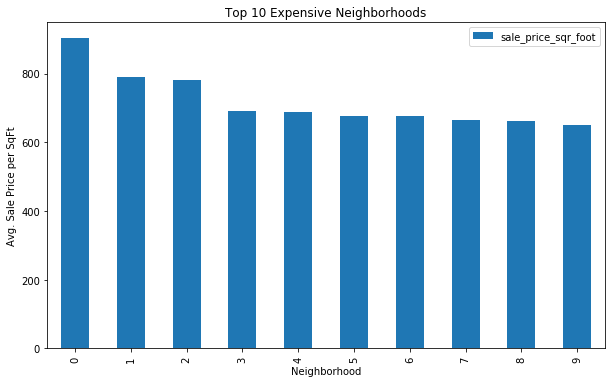

In [16]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expensive_neighborhoods_bar_plot = top_10_expensive_neighborhoods.plot.bar(xlabel='Neighborhood',ylabel='Avg. Sale Price per SqFt',y='sale_price_sqr_foot',title='Top 10 Expensive Neighborhoods', figsize=(10,6))
top_10_expensive_neighborhoods_bar_plot

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [17]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_data_neighborhood

year            neighborhood  sale_price_sqr_foot  housing_units  \
0    2010            Alamo Square           291.182945       372560.0   
1    2010              Anza Vista           267.932583       372560.0   
2    2010                 Bayview           170.098665       372560.0   
3    2010        Buena Vista Park           347.394919       372560.0   
4    2010        Central Richmond           319.027623       372560.0   
..    ...                     ...                  ...            ...   
392  2016          Telegraph Hill           903.049771       384242.0   
393  2016              Twin Peaks           970.085470       384242.0   
394  2016  Van Ness/ Civic Center           552.602567       384242.0   
395  2016       Visitacion Valley           328.319007       384242.0   
396  2016           Westwood Park           631.195426       384242.0   

     gross_rent  
0        1239.0  
1        1239.0  
2        1239.0  
3        1239.0  
4        1239.0  
..          ...  
392      4390.0  
393      4390.0  
394      4390.0  
395      4390.0  
396      4390.0  

[397 rows x 5 columns]

In [18]:
# Plotting the data to comparing average sale price per sqft versus average monthly rent by year
comparing_hvplot = sfo_data_neighborhood.hvplot.bar(
    x='year',
    y=['sale_price_sqr_foot','gross_rent'],
    xlabel='Year',
    ylabel='Price',
    groupby='neighborhood',rot=90)
comparing_hvplot

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [19]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
location_data = pd.read_csv(file_path)
location_data.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [20]:
# Calculate the mean values for each neighborhood
sfo_data_updated = sfo_data.groupby('neighborhood').mean().reset_index()
sfo_data_updated

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0         Alamo Square           366.020712      378401.00  2817.285714
1           Anza Vista           373.382198      379050.00  3031.833333
2              Bayview           204.588623      376454.00  2318.400000
3      Bayview Heights           590.792839      382295.00  3739.000000
4      Bernal Heights            576.746488      379374.50  3080.333333
..                 ...                  ...            ...          ...
68         West Portal           498.488485      376940.75  2515.500000
69    Western Addition           307.562201      377427.50  2555.166667
70  Westwood Highlands           533.703935      376454.00  2250.500000
71       Westwood Park           687.087575      382295.00  3959.000000
72         Yerba Buena           576.709848      377427.50  2555.166667

[73 rows x 4 columns]

In [21]:
# Join the average values with the neighborhood locations
cost_location_data = pd.concat([sfo_data_updated,location_data], axis='columns', join='inner').drop(columns='Neighborhood')
cost_location_data.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0     Alamo Square           366.020712       378401.0  2817.285714   
1       Anza Vista           373.382198       379050.0  3031.833333   
2          Bayview           204.588623       376454.0  2318.400000   
3  Bayview Heights           590.792839       382295.0  3739.000000   
4  Bernal Heights            576.746488       379374.5  3080.333333   

         Lat         Lon  
0  37.791012 -122.402100  
1  37.779598 -122.443451  
2  37.734670 -122.401060  
3  37.728740 -122.410980  
4  37.728630 -122.443050

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

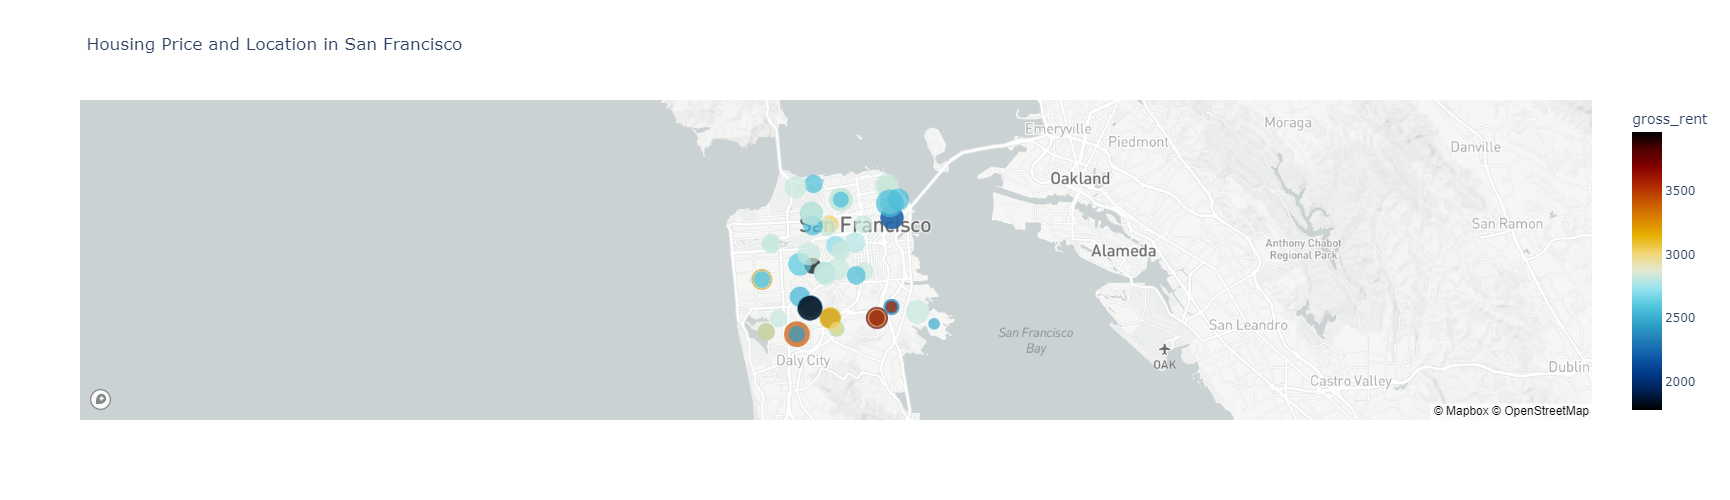

In [22]:
# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    cost_location_data,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color='gross_rent',
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="neighborhood",
    title="Housing Price and Location in San Francisco",
    zoom=10,
    width=1000,
    height= 500
)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [23]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = sfo_data_neighborhood[sfo_data_neighborhood["neighborhood"].isin(top_10_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()
# Group by neighborhood and calculate the means
df_expensive_neighborhoods_avg = df_expensive_neighborhoods_per_year.groupby('neighborhood').mean().reset_index().sort_values('sale_price_sqr_foot', ascending=False)
df_expensive_neighborhoods_avg


neighborhood         year  sale_price_sqr_foot  housing_units  \
8  Union Square District  2012.500000           903.993258      377427.50   
1         Merced Heights  2014.000000           788.844818      380348.00   
2          Miraloma Park  2011.750000           779.810842      375967.25   
3        Pacific Heights  2013.000000           689.555817      378401.00   
9          Westwood Park  2015.000000           687.087575      382295.00   
7         Telegraph Hill  2013.000000           676.506578      378401.00   
5       Presidio Heights  2013.000000           675.350212      378401.00   
0             Cow Hollow  2013.000000           665.964042      378401.00   
4           Potrero Hill  2013.000000           662.013613      378401.00   
6            South Beach  2011.666667           650.124479      375805.00   

    gross_rent  
8  2555.166667  
1  3414.000000  
2  2155.250000  
3  2817.285714  
9  3959.000000  
7  2817.285714  
5  2817.285714  
0  2817.285714  
4  2817.285714  
6  2099.000000

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


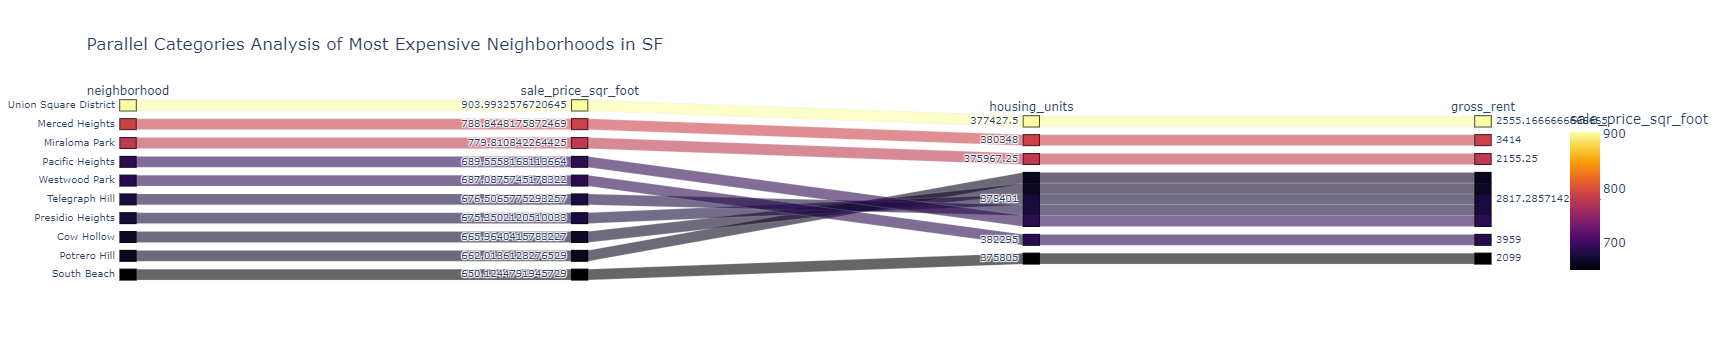

In [24]:
# Parallel Categories Plot
parallel_categories_plot = px.parallel_categories(
    df_expensive_neighborhoods_avg,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units",'gross_rent'],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title = 'Parallel Categories Analysis of Most Expensive Neighborhoods in SF'
)
parallel_categories_plot.show()

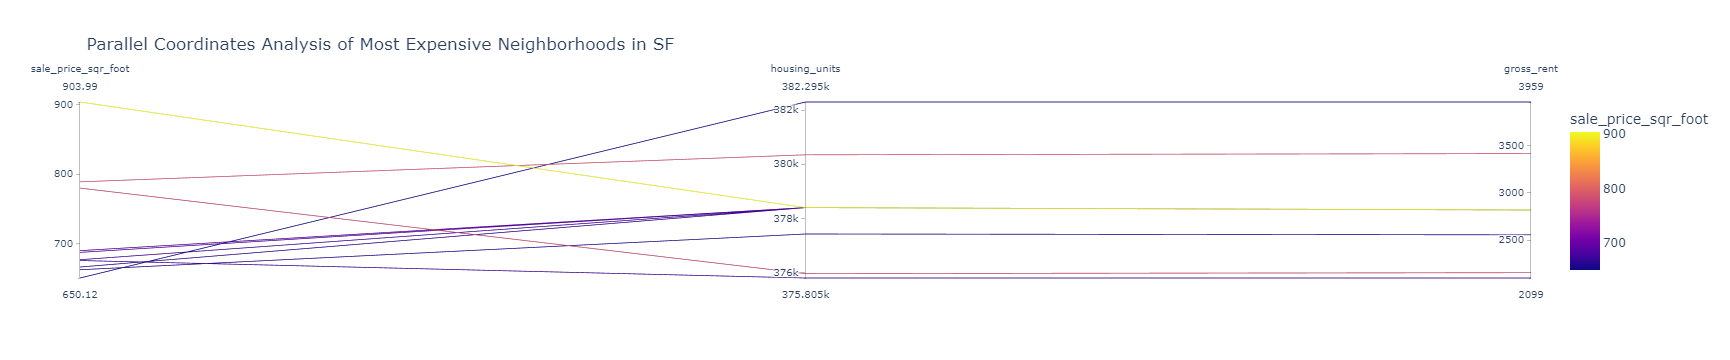

In [25]:
# Parallel Coordinates Plot
parallel_coordinates_plot = px.parallel_coordinates(df_expensive_neighborhoods_avg[['sale_price_sqr_foot','housing_units','gross_rent']], color='sale_price_sqr_foot',title ='Parallel Coordinates Analysis of Most Expensive Neighborhoods in SF')
parallel_coordinates_plot.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

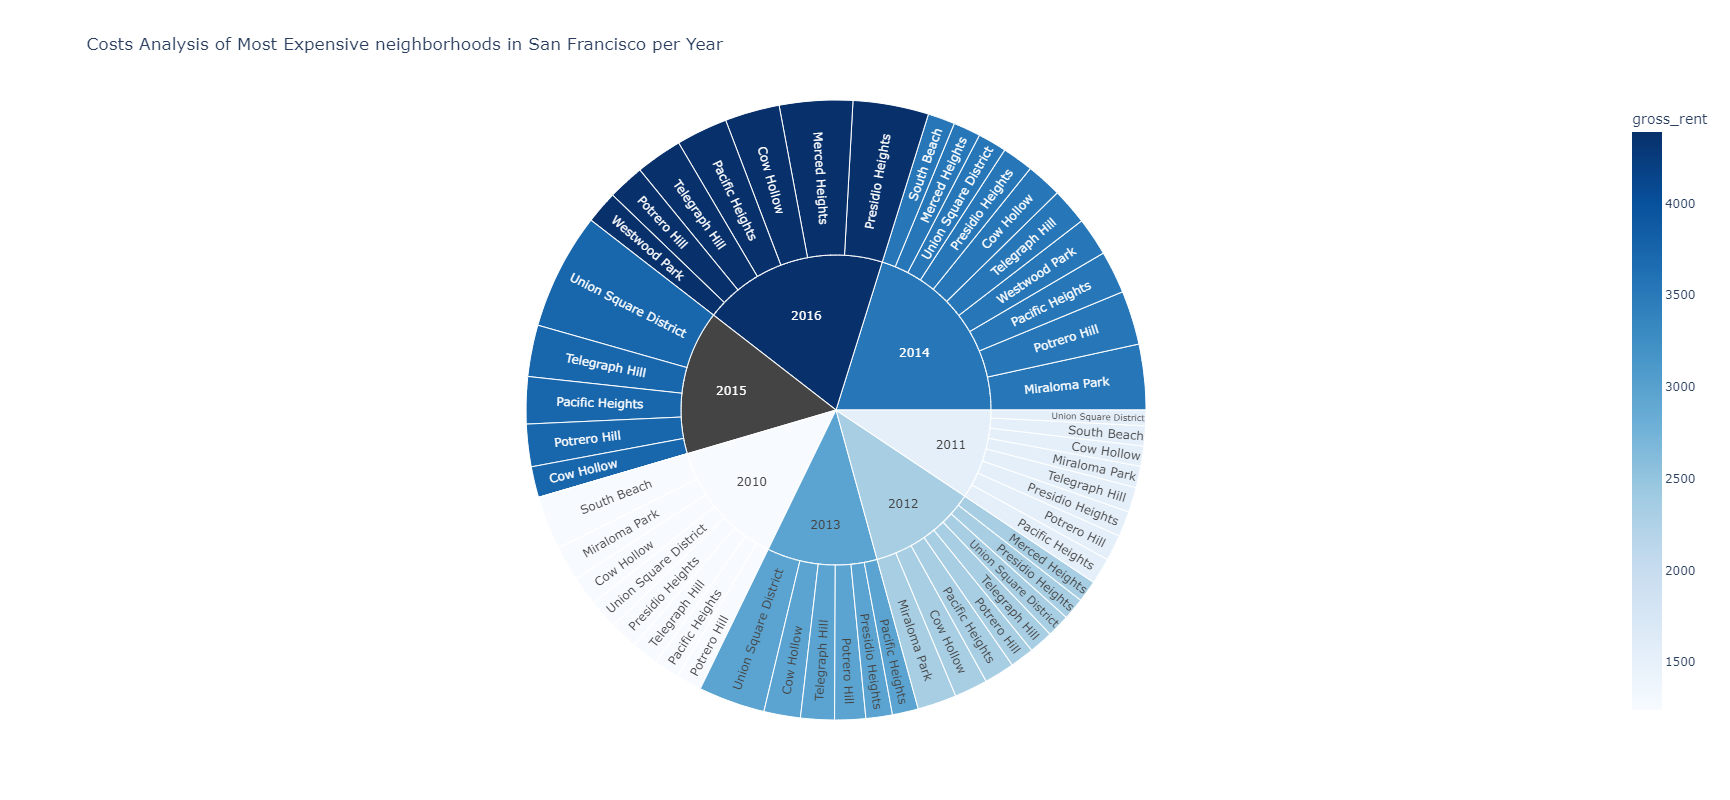

In [26]:
# Sunburst Plot
sunburst_plot = px.sunburst(
    df_expensive_neighborhoods_per_year,
    path=['year', 'neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    color_continuous_scale='blues',
    width =1500,
    height =800,
    title='Costs Analysis of Most Expensive neighborhoods in San Francisco per Year'
)
sunburst_plot.show()